# Python'da SQL Kullanımı

## SQL Nedir

SQL herhangi bir veri tabanı ortamında kullanılan bir alt dildir. SQL ile yalnızca veri tabanı üzerinde işlem yapılabilir; veritabanlarında bulunan sistemlere bilgi ekleme, bilgi değiştirme, bilgi çıkarma ve bilgi sorgulama için kullanılmaktadır.

## SQLite Nedir ve Neden Kullanılır

Sqlite, bir veritabanı kütüphanesidir. Kullanımı ve kurulumu oldukça kolaydır

Sqlite herhangi bir ana sunucu işlemi gerektirmez

Sqlite, dosya biçimli bir çapraz platformdur

Sqlite kaynak kodları okunabilir durumdadır

#### SQLite kütüphanesini import ederek başalayalım

In [1]:
import sqlite3 as sql

#### Şimdi ilk veri tabanımızı oluşturmayı öğrenelim

In [2]:
connect = sql.connect('deneme.db')

Bu işlem bir veritabanına bağlanmayı sağlar. Eğer 'deneme' isminde bi veri tabanı varsa bağlanır yoksa oluşturur.

Bir sonra ki adımda bu veritabanının içine tablo ekleyelim.

In [3]:
cursor = connect.cursor()

cursor.execute("CREATE TABLE IF NOT EXISTS USERS(name text, lastname text, age integer)")
print('Tablo oluşturuldu')

Tablo oluşturuldu


Tablomunzu oluşturduk ve içine 'name' , 'lastname' ve 'age' kolonlarını ekledik.

Bir sonra ki adımda bu tabloya veri ekleyelim.

In [4]:
cursor.execute("INSERT INTO USERS VALUES('Yılmaz', 'Ersoy', 39)")


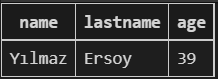

Şimdi tablomuza birden fazla veri ekleyelim

In [5]:

add_command = "INSERT INTO USERS VALUES {}"
datas =[('Süleyman', 'Çakır', 18), ('Polat', 'Alemdar', 22),('Aybüke','Aydemir',21),('Mertcan', 'Duran', 21), ('Eren', 'Acarer',21)]
for data in datas:
    cursor.execute(add_command.format(data))

    

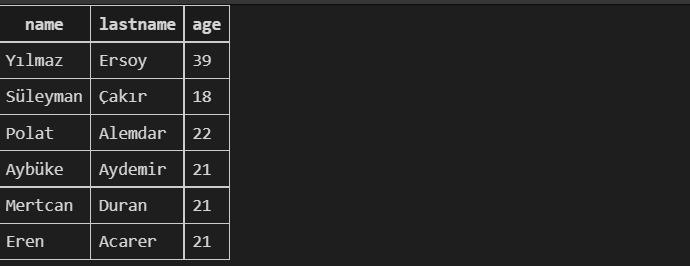

Şimdi tablodaki değerleri güncelleyelim

İsmi 'Yılmaz' olan yerlerin soyadını 'Çakır' olarak güncelleyelim

In [6]:
cursor.execute("UPDATE USERS SET lastname ='Çakır' WHERE name = 'Yılmaz'" )

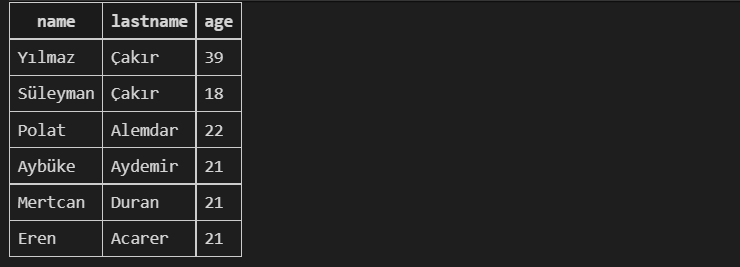

Şimdi tablodan veri silmeyi öğrenelim

Soyadı 'Çakır' olan yerleri tablodan silelim.

In [7]:
cursor.execute("DELETE from USERS WHERE lastname = 'Çakır'")

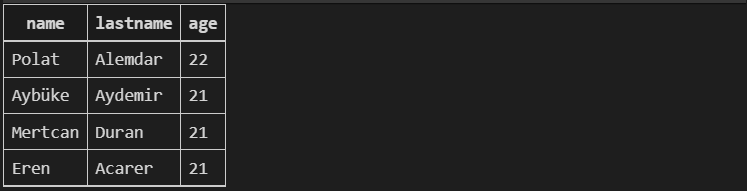

Şimdi bu tablomuzu terminale yazdıralım

Bunun için pandas kütüphanesine ihtiyacımız var.

In [8]:
import pandas as pd

df = pd.read_sql_query("SELECT * FROM USERS", connect)
print(df)

      name lastname  age
0    Polat  Alemdar   22
1   Aybüke  Aydemir   21
2  Mertcan    Duran   21
3     Eren   Acarer   21


SQL'de Between Like ve In methodlarının kullanımını öğrenelim

In [11]:
cursor.execute("SELECT * FROM USERS WHERE age BETWEEN 22 AND 25")
array = cursor.fetchall()
print(array)

[('Polat', 'Alemdar', 22)]


In [18]:
cursor.execute("SELECT * FROM USERS WHERE name LIKE '%er%'")
array = cursor.fetchall()
print(array)

[('Mertcan', 'Duran', 21), ('Eren', 'Acarer', 21)]


In [15]:
cursor.execute("SELECT * FROM USERS WHERE lastname IN ('Aydemir','Yılmaz')")
array = cursor.fetchall()
print(array)

[('Aybüke', 'Aydemir', 21)]


Şimdi veritabanını kapatalım

In [ ]:
connect.commit()
connect.close()

# SQLite ile Proje öreneği 

SQL'in temel fonksiyonlarını öğrendiğimize göre, şimdi bir proje üzerinde çalışabiliriz.

Proje olarak hedefimiz FIFA 23 oyuncularının özelliklerini içeren bir veritabanı yazmak ve bu veritabanından istediğimiz verileri terminale yazdırmak.


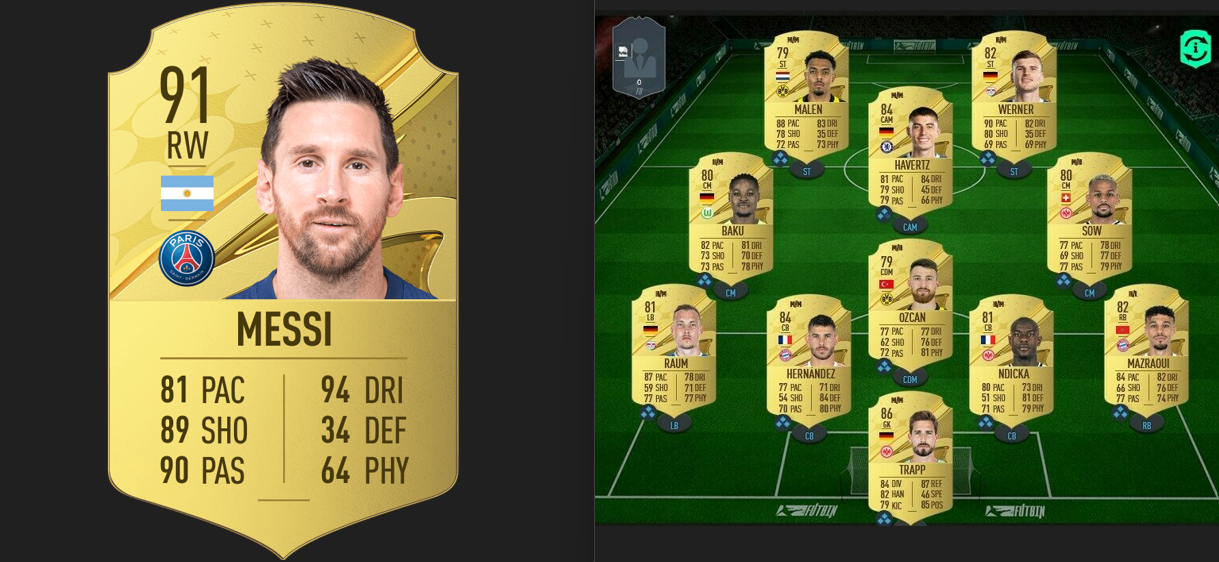

https://www.kaggle.com/datasets/cashncarry/fifa-23-complete-player-dataset linkinden oyuncularının özelliklerini içeren 'fifa23_datasheet.csv' dosyasını indirelim

In [1]:
import pandas as pd

df = pd.read_csv('players_fifa23.csv')
df.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


Şimdi istemediğimiz kolonları dataframe'den silelim.

In [2]:
df.drop(['ID','Growth','Name', 'STRating', 'PhotoUrl', 'LWRating','LFRating', 
'CFRating', 'RFRating', 'RWRating', 'CAMRating', 'BaseStats','LMRating',
'CMRating', 'RMRating', 'LWBRating', 'CDMRating', 'IntReputation','RWBRating'
,'LBRating', 'CBRating', 'RBRating', 'GKRating','ValueEUR', 'WageEUR', 
'ReleaseClause','ClubPosition', 'ContractUntil', 'ClubNumber', 'ClubJoined', 
'OnLoad','NationalPosition', 'NationalNumber','AttackingWorkRate',
'DefensiveWorkRate', 'Agility', 'Reactions', 'Balance',
'Jumping', 'Strength', 'LongShots', 'Aggression',
'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
'Marking', 'StandingTackle', 'SlidingTackle', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
'Curve', 'FKAccuracy'],axis=1, inplace=True)

df.head()

,FullName,Age,Height,Weight,Nationality,Overall,Potential,TotalStats,Positions,BestPosition,...,BallControl,Acceleration,SprintSpeed,ShotPower,Stamina,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,Lionel Messi,35,169,67,Argentina,91,91,2190,RW,CAM,...,93,87,76,86,70,6,11,15,14,8
1,Karim Benzema,34,185,81,France,91,91,2147,"CF,ST",CF,...,91,79,80,87,82,13,11,5,5,7
2,Robert Lewandowski,33,185,81,Poland,91,91,2205,ST,ST,...,89,76,75,91,76,15,6,12,8,10
3,Kevin De Bruyne,31,181,70,Belgium,91,91,2303,"CM,CAM",CM,...,90,76,73,92,88,15,13,5,10,13
4,Kylian Mbappé,23,182,73,France,91,95,2177,"ST,LW",ST,...,91,97,97,88,87,13,5,7,11,6


Geri kalan verileri bir veri tabanı oluşturup içine atalım.

In [4]:
import sqlite3 as sql

connect = sql.connect('fifa23.db')
cursor = connect.cursor()
cursor.execute("""CREATE TABLE IF NOT EXISTS PLAYERS(FullName text, Age integer, Height integer, Weight integer, Nationality text,
    Overall integer, Potential integer, TotalStats integer, Positions text, BestPosition text, Club text,
    NationalTeam text, PreferredFoot text, WeakFoot integer, SkillMoves integer, PaceTotal integer,
    ShootingTotal integer, PassingTotal integer, DribblingTotal integer, DefendingTotal integer, 
    PhysicalityTotal integer, Crossing integer, Finishing integer, Dribbling integer, LongPassing integer,
    BallControl integer, Acceleration integer, SprintSpeed integer, ShotPower integer, Stamina integer,
    GKDiving integer, GKHandling integer, GKKicking integer, GKPositioning integer, GKReflexes integer)""")

In [5]:
for i in range(df.shape[0]):

    data = df.iloc[i]
    data = tuple(data)

    add_command = "INSERT INTO PLAYERS VALUES {}"
    cursor.execute(add_command.format(data))
    
df = pd.read_sql_query("SELECT * FROM PLAYERS", connect)

df.shape

(18539, 35)

örnek bir oyuncu araması yapalım

istediğimiz özellikler forvet olması ve şut gücünün 90'dan fazla olması olsun. 

In [10]:
dict ={'FullName':0 ,'Age':1 ,'Height': 2,'Weight': 3,'Nationality': 4,'Overall': 5,
'Potential': 6,'TotalStats':7 , 'Positions':8 ,'BestPosition': 9,'Club': 10,'NationalTeam': 11,
'PreferredFoot': 12,'WeakFoot': 13,'SkillMoves':14 ,'PaceTotal': 15,'ShootingTotal': 16,'PassingTotal': 17,
'DribblingTotal':18 ,'DefendingTotal':19 ,'PhysicalityTotal':20 ,'Crossing':21 ,'Finishing': 22,'Dribbling': 23,
'LongPassing':24,'BallControl': 25,'Acceleration':26, 'SprintSpeed': 27,'ShotPower':28 ,'Stamina':29 ,'GKDiving':30 ,
'GKHandling':31 ,'GKKicking':32,'GKPositioning':33 ,'GKReflexes':34}

In [55]:
array = ['ST', 90]
search = "SELECT * from PLAYERS WHERE BestPosition = '{}' AND ShotPower >= {}"
cursor.execute(search.format(*array))

r = cursor.fetchall()

for i in range(len(r)):
    print(r[i][0]+' '+ str(r[i][dict['BestPosition']])+' '+str(r[i][dict['ShotPower']]))

Robert Lewandowski ST 91
C. Ronaldo dos Santos Aveiro ST 93
Harry Kane ST 92
Erling Haaland ST 94
Marcus Rashford ST 92
Gareth Bale ST 90
Lukas Podolski ST 90


In [128]:
def oyuncu_arama():
    array = []
    for i in range(4):
        s = input('değer girin : ')
        try :
            s = int(s)
        except:
            pass
        array.append(s)
        
    search = "SELECT * from PLAYERS WHERE {} = '{}' AND {} = '{}' "    
    cursor.execute(search.format(*array))

    r = cursor.fetchall()    
    for i in range(len(r)):
        print(r[i][0]+' '+ str(r[i][dict['Overall']])+' '+str(r[i][dict['Potential']]))
        

oyuncu_arama()
    

değer girin : Overall
değer girin : 90
değer girin : Potential
değer girin : 90
Mohamed Salah 90 90
Manuel Neuer 90 90
C. Ronaldo dos Santos Aveiro 90 90
Virgil van Dijk 90 90


In [125]:
import numpy as np

def maximum_bulma(özellik):
    
    data = [özellik]
    
    search = "SELECT Fullname,{} from PLAYERS"
    cursor.execute(search.format(*data))
    r = cursor.fetchall()
    
    arr = np.array(r)
    location = arr[:,1].astype(np.float64).argmax()
    
    return r[location]

    
print(maximum_bulma('PaceTotal'))
print(maximum_bulma('ShotPower'))

('Kylian Mbappé', 97)
('Erling Haaland', 94)
